## Visual Art Generation with Tensorflow

When using Google’s deep dream library and pre-trained models it is up to the user to find appropriate parameters that are visually appealing and enhance the artistic value of a given image. Current tutorials and models are focused on manual parameter tuning and do not allow semi-automatized exploration of different combinations of parameters. 

The current approach of this notebook is to allow a semi-automatized exploration of visually appealing settings based on M. Pedersen’s implementation of deep dream in TensorFlow by offering a grid overview of various resulting images.
Furthermore by blending different complementary images together it is tried to create visually interesting effects.

In [39]:
import inception5h
import math
import os
from os import listdir
import tensorflow as tf
import utils
import PIL.Image
import pprint

from image_processing import process_and_save_img, blend_images, resize_secondary_image
from IPython.core.display import HTML
from IPython.display import display

In [46]:
# download deep dream model if it does not yet exist locally
inception5h.maybe_download()

# load model
model = inception5h.Inception5h()
print('{} model loaded \n'.format(model))

# create TensorFlow session
session = tf.InteractiveSession(graph=model.graph)
print('tensorflow session created: \n{}\n'.format(session))
print('Layers available for visual exploration:')
pprint.pprint(model.layer_names)

Data has apparently already been downloaded and unpacked.
<inception5h.Inception5h object at 0x1346e8748> model loaded 

tensorflow session created: 

Layers available for visual exploration:
['conv2d0',
 'conv2d1',
 'conv2d2',
 'mixed3a',
 'mixed3b',
 'mixed4a',
 'mixed4b',
 'mixed4c',
 'mixed4d',
 'mixed4e',
 'mixed5a',
 'mixed5b']


In [55]:
# The available categories are organized in folders

categories = {1: 'cats',
              2: 'urban',
              3: 'landscape',
              4: 'people',
              5: 'slides'}

# Specify the category you are interested in
category = categories[4]

# Set up paths where to pick up images from
full_path = os.path.join(os.getcwd(),'img', category)
files_list = [x for x in os.listdir(full_path) if x != '.DS_Store']

files_dict = {k: v for k, v in enumerate(files_list)}

pprint.pprint('Available images:')
pprint.pprint(files_dict)

'Available images:'
{0: 'people1.jpg',
 1: 'people10.jpg',
 2: 'people11.jpg',
 3: 'people12.png',
 4: 'people2.jpg',
 5: 'people3.jpg',
 6: 'people4.jpg',
 7: 'people5.jpg',
 8: 'people6.jpg',
 9: 'people7.jpg',
 10: 'people8.jpg',
 11: 'people9.jpg'}


The image that will be processed: /Users/stefantippelt/deep-dream-viz/src/img/people/people12.png


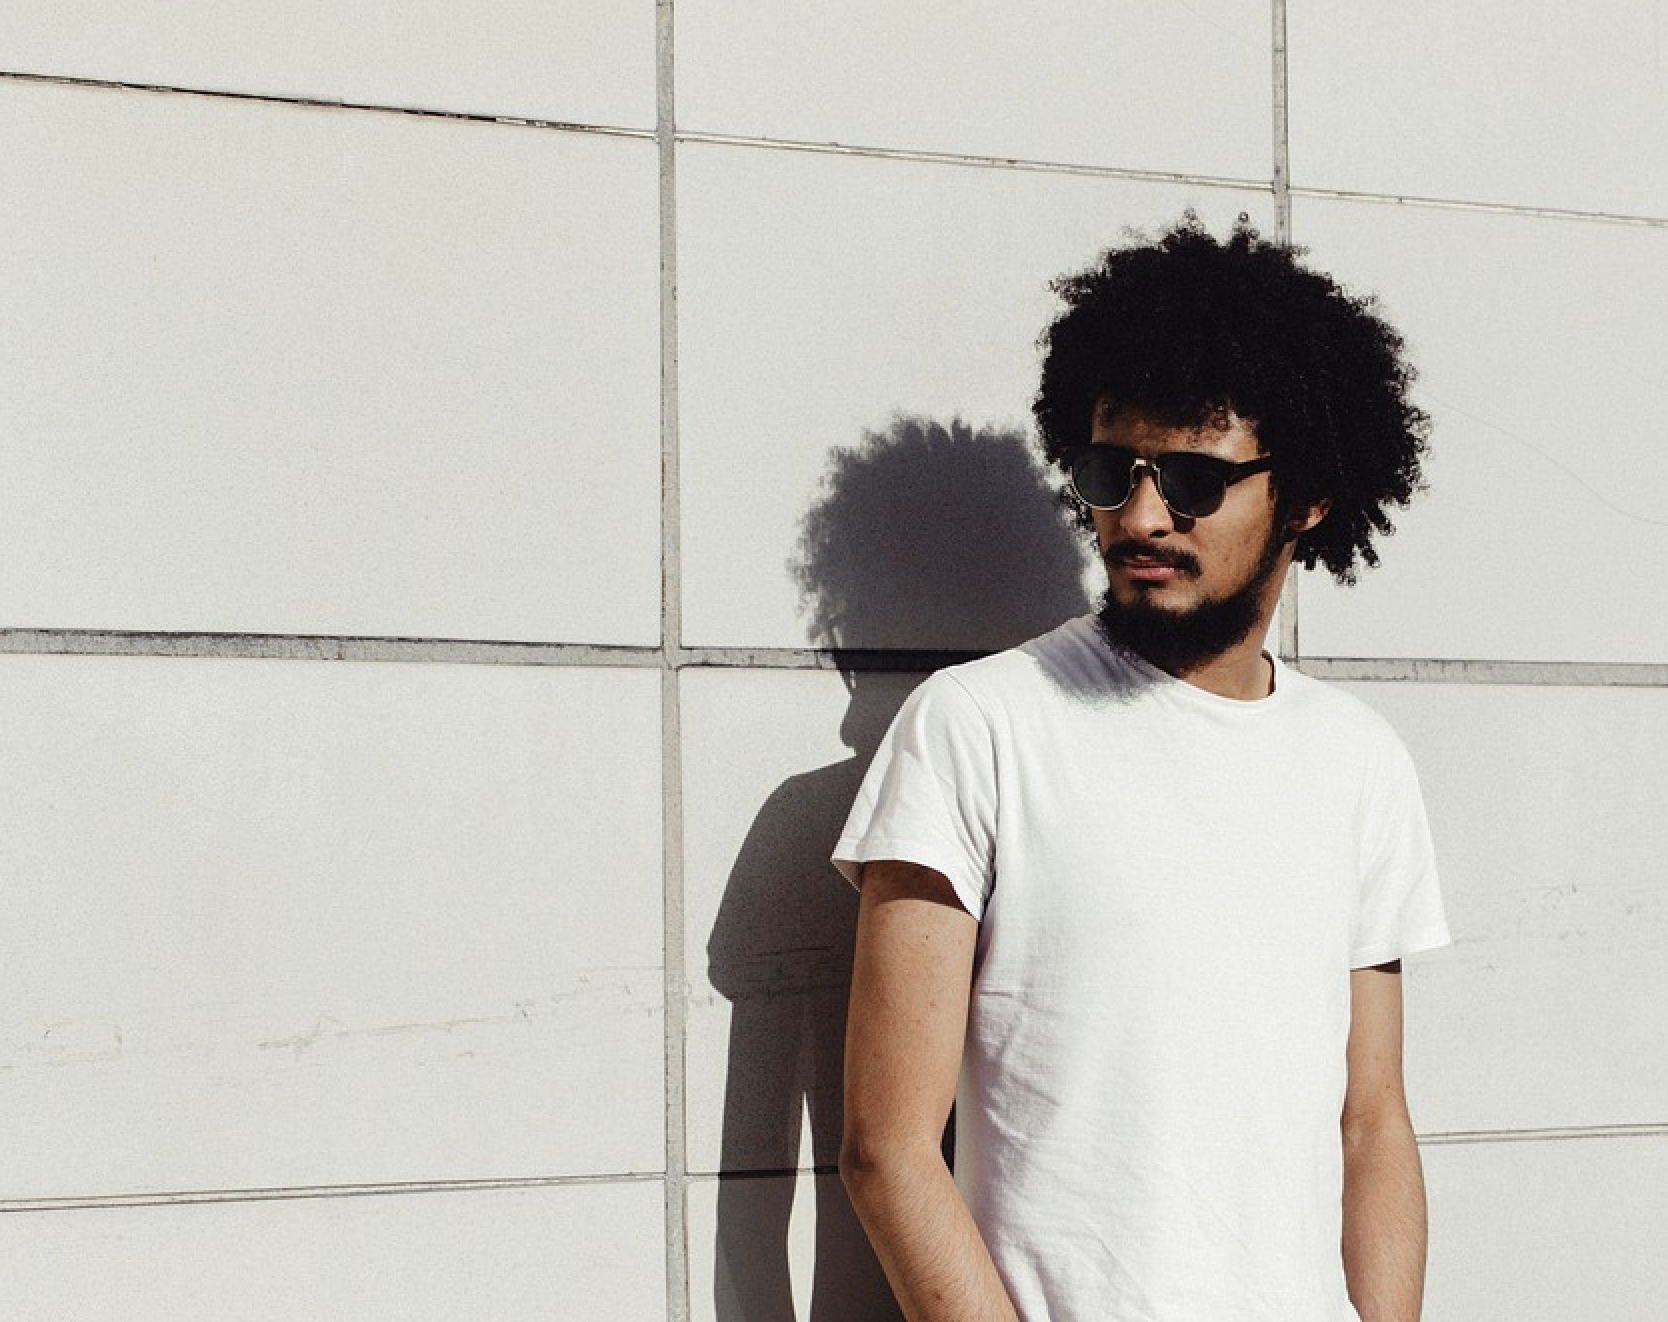

In [49]:
# reference picture in files_dict you are interested in
filename = files_dict[4]

# create path to file
filename_path = os.path.join(full_path, filename)

# load input image from folder
image = utils.load_image(filename=filename_path)
print('The image that will be processed:', filename_path)

utils.plot_image(image)

In [7]:
# create path where to store output images
output_path = full_path + '_output_' + os.path.splitext(filename)[0]
print('The resulting images are stored to the folder:', output_path)

The resulting images are stored to the folder: /Users/stefantippelt/deep-dream-viz/src/img/people_output_people12


In [8]:
%%time
# run model and save images to output folders
img_dict = process_and_save_img(input_name=filename, category=category, output_path=output_path, image=image, 
                                model=model, session=session, num_repeats=3.0, rescale_factor=0.7, 
                                step_size=3.0, speedup=True)

KeyboardInterrupt: 

In [11]:
HTML("""
<style>
* {
    box-sizing: border-box;
}

body {
    margin: 0;
    font-family: Arial;
}

.header {
    text-align: center;
    padding: 32px;
}

/* Create four equal columns that floats next to each other */
.column {
    float: left;
    width: 25%;
    padding: 10px;
}

.column img {
    margin-top: 12px;
}

/* Clear floats after the columns */
.row:after {
    content: "";
    display: table;
    clear: both;
}

/* Responsive layout - makes a two column-layout instead of four columns */
@media (max-width: 800px) {
    .column {
        width: 50%;
    }
}

/* Responsive layout - makes the two columns stack on top of each other instead of next to each other */
@media (max-width: 600px) {
    .column {
        width: 100%;
    }
}
</style>
""")

In [20]:
# define output file
output_file = category + '_output_' + os.path.splitext(filename)[0] + '/'

# define list for images with different blend parameters
images0 = []
images2 = []
images4 = []
images6 = []

# get all images in directory
for image in img_dict.keys():
# for image in listdir(os.path.join('img', output_file)):
    # store names of images with different blend parameters in subfolders
    blend0 = []
    blend2 = []
    blend4 = []
    blend6 = []
    
    # iterate through image dict and append to proper blend file
    for key, value in img_dict.items():
        if value['blend'] == 0.0:
            blend0.append(value['filename'])
        if value['blend'] == 0.2:
            blend2.append(value['filename'])
        if value['blend'] == 0.4:
            blend4.append(value['filename'])
        if value['blend'] == 0.6:
            blend6.append(value['filename'])

# create HTML output for the single blend parameters as separate columns
for image in blend0:
    img0 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images0.append(img0)

for image in blend2:
    img2 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images2.append(img2)

for image in blend4:
    img4 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images4.append(img4)

for image in blend6:
    img6 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images6.append(img6)

In [21]:
# create HTML and pass images
HTML("""
<div class="row"> 
  <div class="column">
    {images0}
  </div>
  <div class="column">
    {images2}
  </div>
    <div class="column">
    {images4}
  </div>
    <div class="column">
    {images6} 
  </div>
</div>
""".format(images0="\n".join(images0), 
           images2="\n".join(images2), 
           images4="\n".join(images4), 
           images6="\n".join(images6)))

## Merge pictures together - From humans and cities to urban people

By merging pictures from humans with cities where you could imagine them to live in you can create urban people. Living up to the lives they want to live in the deep dreamed cities of their choice. 

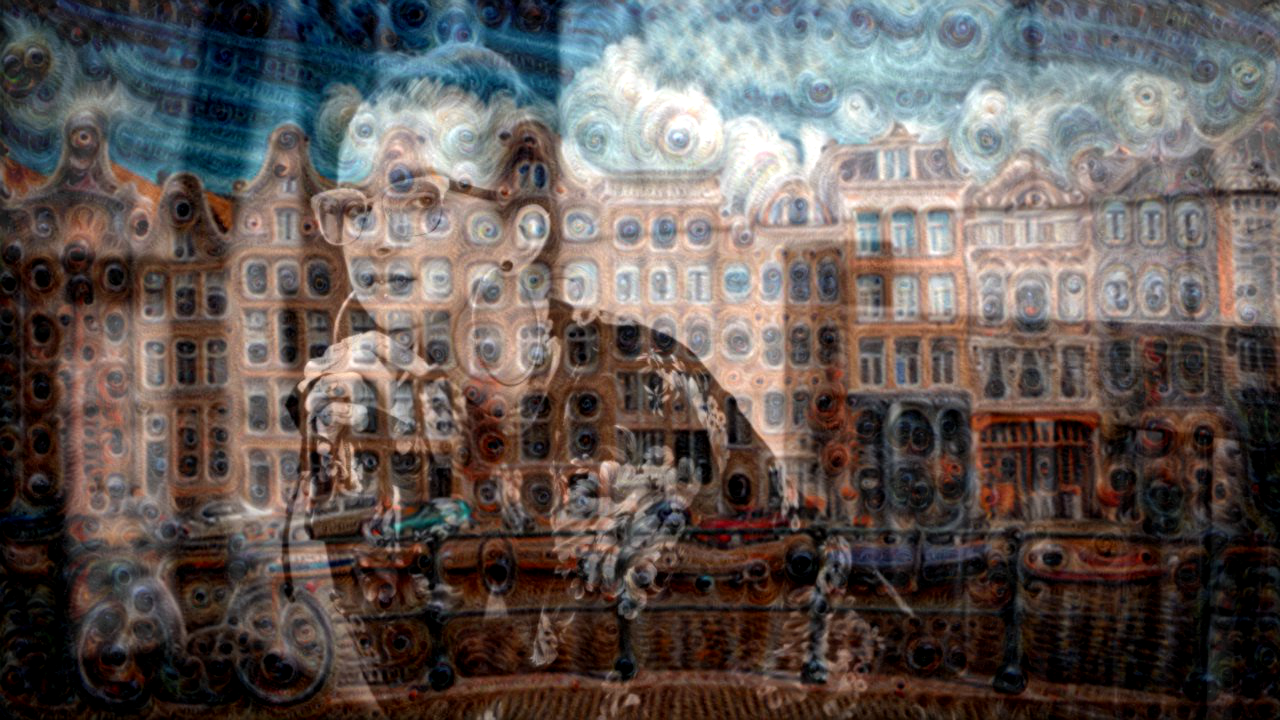

In [10]:
# pass primary image and secondary image in order to blend them together
primary_image='img/pictures_to_blend/urban17mixed3b_00_0.jpg'
secondary_image='img/pictures_to_blend/people7mixed3b_00_2.jpg'

# bring the secondary image to the size of the primary one
resize_secondary_image(primary_image=primary_image, secondary_image=secondary_image)

# blend images together by specifying the dominant picture using alpha
blend_images(primary_image='img/pictures_to_blend/urban17mixed3b_00_0.jpg', 
             secondary_image='img/pictures_to_blend/people7mixed3b_00_2.jpg', 
             alpha=0.55, saturation_enhance=20, contrast_enhance=1.3)

In [7]:
primary_image = 'img/pictures_to_blend/' + str('img/pictures_to_blend/urban20conv2d0_00_2.jpg')
secondary_image = 'img/pictures_to_blend/' + str('img/pictures_to_blend/people5mixed4b_00_2.jpg')

resize_secondary_image(primary_image=primary_image, secondary_image=secondary_image)

blend_images(primary_image=primary_image, secondary_image=secondary_image, 
             alpha=0.55, saturation_enhance=20, contrast_enhance=1.3)

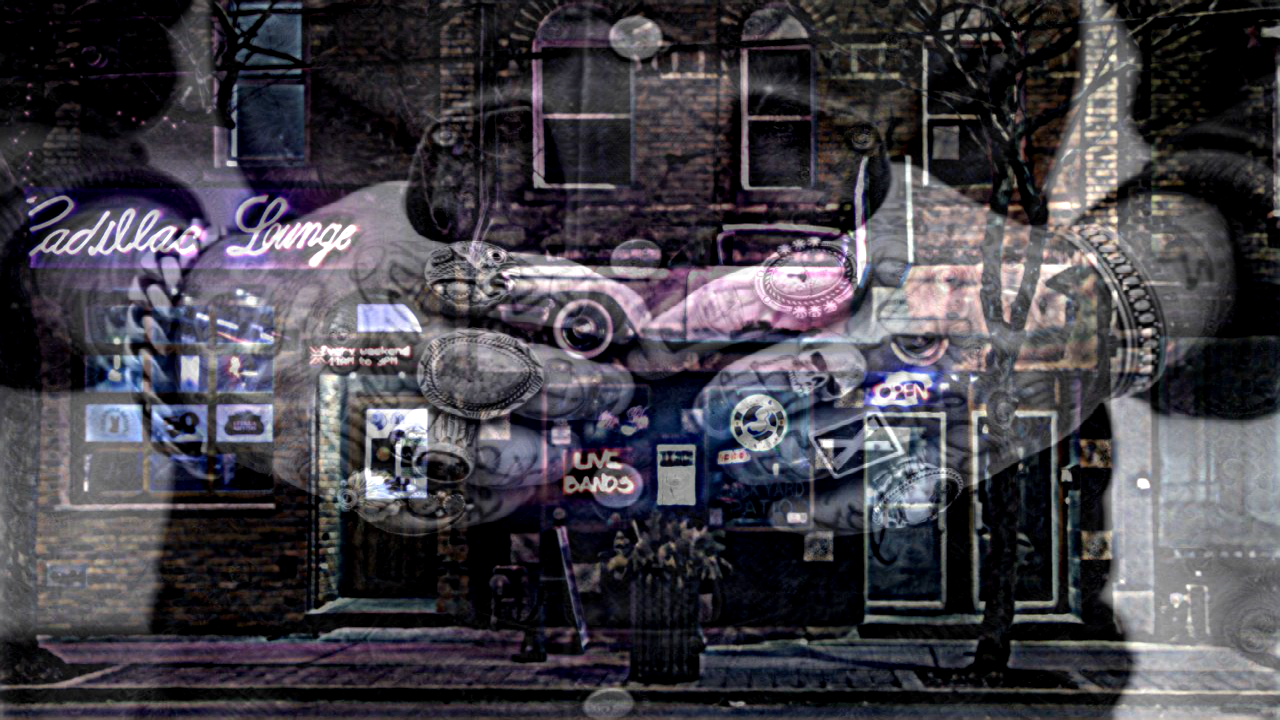

In [5]:
blend_images(primary_image=primary_image, secondary_image=secondary_image, 
             alpha=0.55, saturation_enhance=20, contrast_enhance=1.3)

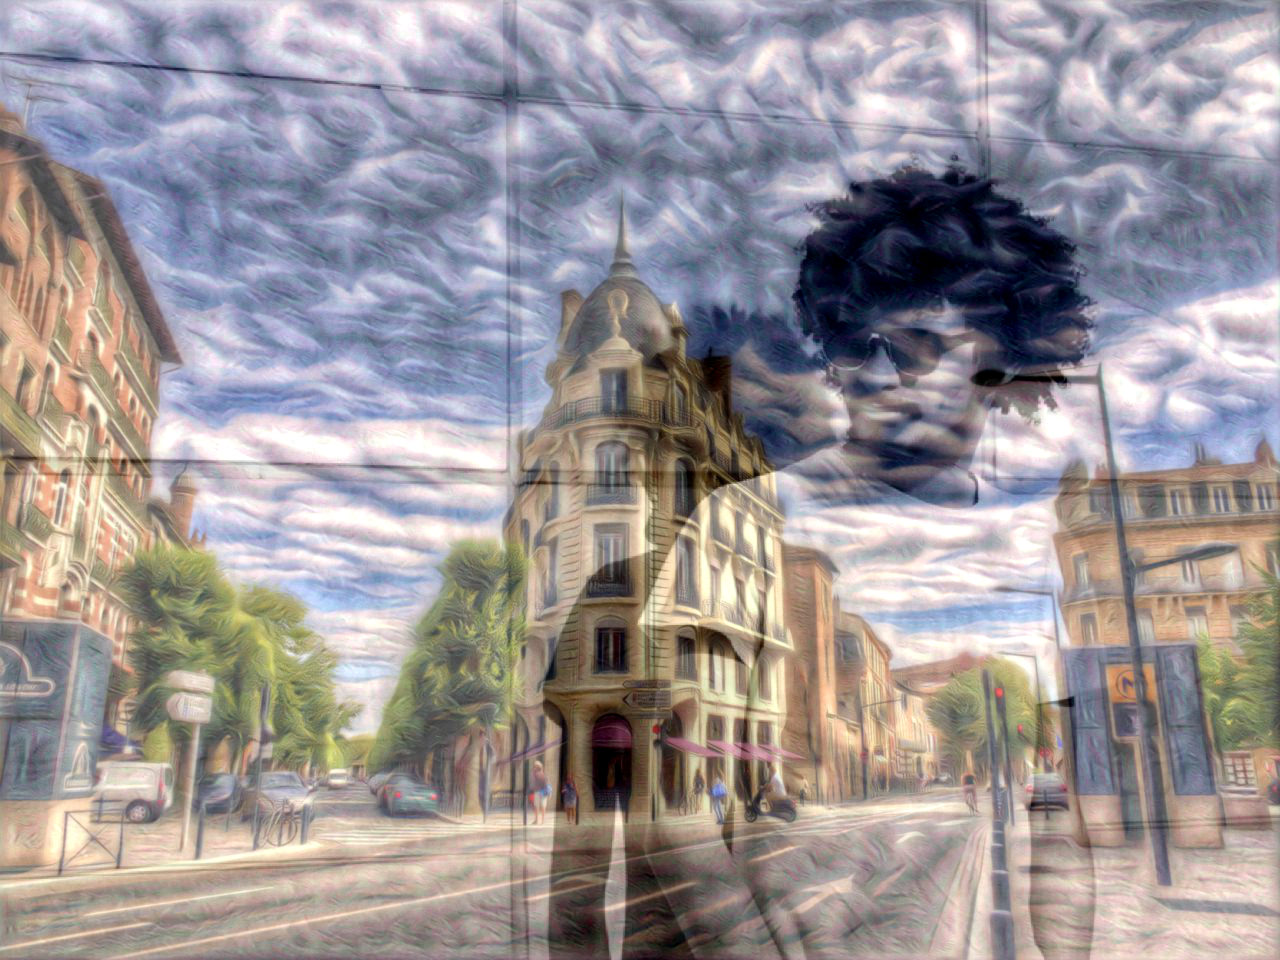

In [5]:
primary_image = 'img/pictures_to_blend/' + 'urban19conv2d1_00_2' + '.jpg'
secondary_image = 'img/pictures_to_blend/' + 'people12conv2d1_00_2' + '.jpg'

resize_secondary_image(primary_image=primary_image, secondary_image=secondary_image)
blend_images(primary_image=primary_image, secondary_image=secondary_image, alpha=0.45, saturation_enhance=20,
             contrast_enhance=1.3)